<a href="https://colab.research.google.com/github/Fakkiie/pathology-slides/blob/main/paddle_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Dependencies

In [ ]:
!pip install -q  paddlepaddle paddleocr PyMuPDF
!pip install -q pdf2image
!pip install -q opencv-python
!pip install -q numpy
!pip install -q Pillow
!pip install -q matplotlib
!pip install -q fitz
!cat /proc/cpuinfo | grep "model name"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 62.3 MB/s eta 0:00:00
  

###Imports

In [ ]:

import paddle
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from pdf2image import convert_from_path

In [ ]:
import fitz
import pymupdf

## **Paddle Testing on PDF files**
Below I tested PaddleOCR on pdf files that contained pictures to gain some insight on how its performance compares to Tesseract. To test Paddle pdf files, you must upload them to Colab yourself in the file tab and then switch the pdf path as needed.


*Important: You must enable T4 GPU before running the program as it is quite memory extensive and the regular CPU does not have enough memory to properly run the program.*

In [ ]:
ocr = PaddleOCR()

download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_det_infer.tar to /root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer/ch_PP-OCRv4_det_infer.tar


100%|██████████| 4780/4780 [00:16<00:00, 281.21it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer/ch_PP-OCRv4_rec_infer.tar


100%|██████████| 10720/10720 [00:19<00:00, 553.37it/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:15<00:00, 137.37it/s]

[2025/02/03 20:41:03] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [ ]:

pdf_path = "lec03_nkurunze.pdf"  # Replace with your PDF path
doc = pymupdf.open(pdf_path)

all_results = [] # Store results from all pages

In [ ]:
type(doc)


pymupdf.Document

In [ ]:
for page_num in range(doc.page_count):
    page = doc[page_num]
    pix = page.get_pixmap(matrix = pymupdf.Matrix(3,3)) #Get the page as a picture
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples) # Convert the picture into a format PaddleOCR understands
    result = ocr.ocr(np.array(img)) # Perform the OCR
    all_results.append(result) # Add the result from this page to the list of all results


[2025/02/03 21:21:10] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2025/02/03 21:21:10] ppocr DEBUG: dt_boxes num : 71, elapsed : 0.27654075622558594
[2025/02/03 21:21:14] ppocr DEBUG: rec_res num  : 71, elapsed : 4.095568895339966


In [ ]:

# Now you have all the results from all pages in the 'all_results' list.
# You can process them as needed.  Here's a basic example:
for page_num, page_results in enumerate(all_results):
    print(f"--- Page {page_num + 1} ---")
    for line in page_results:
        # line[1][0] contains the extracted text
        extracted_text = line
        print(extracted_text)
    print("\n")  # Add a newline for better readability between pages

--- Page 1 ---
[[[[29.0, 5.0], [301.0, 15.0], [299.0, 61.0], [27.0, 51.0]], ('ccture 3Assignmant', 0.854127049446106)], [[[514.0, 15.0], [755.0, 9.0], [756.0, 48.0], [515.0, 54.0]], ('uestions12', 0.9731436967849731)], [[[22.0, 118.0], [141.0, 112.0], [144.0, 152.0], [24.0, 159.0]], ('i) (1.5)0', 0.749535322189331)], [[[28.0, 164.0], [225.0, 164.0], [225.0, 201.0], [28.0, 201.0]], ('int: 1 fracdion: 0-5', 0.8577722311019897)], [[[29.0, 211.0], [151.0, 216.0], [150.0, 249.0], [27.0, 244.0]], ('(1)10(1)2', 0.7365357875823975)], [[[188.0, 209.0], [312.0, 214.0], [311.0, 247.0], [187.0, 242.0]], ('(.5)0(?)', 0.8455924391746521)], [[[208.0, 241.0], [384.0, 245.0], [384.0, 271.0], [208.0, 267.0]], ('.Sx2=1remcinde', 0.898188054561615)], [[[397.0, 250.0], [429.0, 250.0], [429.0, 263.0], [397.0, 263.0]], ('0☆', 0.8637695908546448)], [[[193.0, 270.0], [336.0, 270.0], [336.0, 304.0], [193.0, 304.0]], ('(.5)10 -(. 1)2', 0.9090007543563843)], [[[98.0, 315.0], [282.0, 315.0], [282.0, 350.0], [98.0,

# **OCR with PaddleOCR on photographs**


Overall Goal:

This code performs Optical Character Recognition (OCR) on an image of a whiteboard taken with an iPhone. The image is expected to be in HEIC format. The code will convert it to JPG for compatibility and then use the PaddleOCR library to extract text from the image. The output will be the extracted text and an image with bounding boxes highlighting the detected text. This project is a test of using PaddleOCR for this specific scenario.


Colab Notebook Instructions:


1. **Enable T4 GPU Runtime:**

- Click on "Runtime" in the top menu.
- Select "Change runtime type."
- In the "Hardware accelerator" dropdown, choose "T4 GPU."
- Click "Save."

*Important: Using a T4 GPU is recommended because PaddleOCR can be memory-intensive, especially when loading models. The T4 GPU provides more memory and processing power than the default CPU runtime.*

2. **Upload Your Image:**


- In the left sidebar, click on the "Files" tab (it looks like a folder icon).
- Click on the "Upload to session storage" button (it looks like a file with an up arrow).
- Select the "helloword.heic" image from your computer and upload it.
Copy and Paste Code:



## **Section 1: Install Dependencies**

In [1]:
# --- Install Dependencies ---
# We need to install the necessary libraries for OCR, image processing, and handling HEIC format.
!pip install -q paddlepaddle paddleocr  # PaddlePaddle and PaddleOCR for OCR
!pip install -q opencv-python numpy Pillow  # OpenCV (for image processing), NumPy (for numerical operations), Pillow (for image handling)
!pip install -q matplotlib  # Matplotlib for visualization
!pip install -q pillow-heif  # Library to add HEIC support to Pillow
!cat /proc/cpuinfo | grep "model name"  # Optional: Display CPU information to confirm the runtime environment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.0 MB/s eta 0:00:00
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
model name	: Intel(R) Xeon(R) CPU @ 2

## **Section 2: Imports**

In [2]:
# --- Imports ---
# Import the libraries we just installed.
import paddle
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from pillow_heif import register_heif_opener

## **Section 3: Initialize PaddleOCR and Register HEIF Opener**

In [3]:
# --- Initialize PaddleOCR and Register HEIF Opener---
# Set up the PaddleOCR engine and register the HEIC opener.

register_heif_opener()  # Enable HEIC support in Pillow

ocr = PaddleOCR(use_angle_cls=True, lang='en')  # Initialize PaddleOCR
# use_angle_cls=True: Enables text angle classification (detects rotated text).
# lang='en': Sets the language to English.

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:15<00:00, 246.50it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:17<00:00, 578.55it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:01<00:00, 1101.02it/s]

[2025/02/06 03:39:43] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

## **Section 4: Image Conversion (HEIC to JPG)**

In [ ]:
# --- Image Conversion (HEIC to JPG) ---
# Convert the HEIC image to JPG for broader compatibility.

image_path = "helloword.heic"  # Path to your uploaded HEIC image
jpg_image_path = "helloword.jpg"  # Path to save the converted JPG image

try:
    image = Image.open(image_path)
    image.convert("RGB").save(jpg_image_path, "jpeg")
    print(f"Image converted successfully to {jpg_image_path}")
except Exception as e:
    print(f"Error during image conversion: {e}")
    exit()

Image converted successfully to helloword.jpg


## **Section 5: Perform OCR**

In [31]:
jpg_image_path = "IMG_3263.JPG"

In [32]:
# --- Perform OCR ---
# Run PaddleOCR on the converted JPG image.

result = ocr.ocr(jpg_image_path, cls=True)  # Perform OCR on the JPG image
# cls=True: Enables character-level classification (improves accuracy).

[2025/02/06 03:50:28] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.1802377700805664
[2025/02/06 03:50:28] ppocr DEBUG: cls num  : 15, elapsed : 0.05692005157470703
[2025/02/06 03:50:29] ppocr DEBUG: rec_res num  : 15, elapsed : 1.252840280532837


## **Section 6: Visualization**

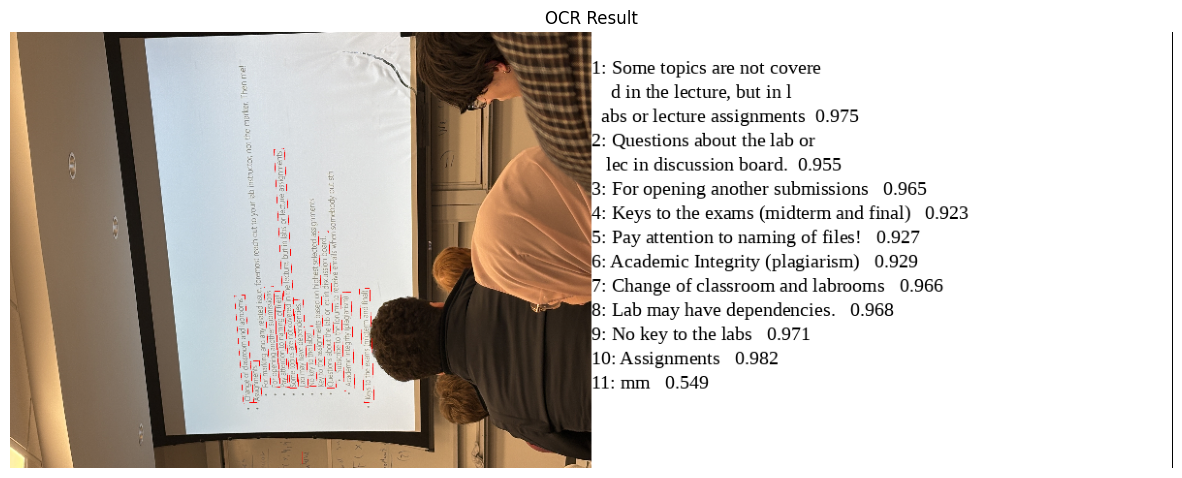

In [33]:
# --- Visualization ---
# Draw bounding boxes around the detected text and display the image.

image = Image.open(jpg_image_path).convert('RGB')
boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')  # Save the image with bounding boxes

plt.figure(figsize=(15, 15))
plt.imshow(im_show)
plt.title('OCR Result')
plt.axis('off')
plt.show()

## **Section 7: Print OCR Result**

In [34]:
# --- Print OCR Result ---
# Print the extracted text to the console.

print("--- OCR Result ---")
for line in result[0]:
    print(line[1][0])

--- OCR Result ---
Some topics are not covered in the lecture, but in labs or lecture assignments
Questions about the lab or lec in discussion board.
For opening another submissions
Keys to the exams (midterm and final)
Pay attention to naming of files!
Academic Integrity (plagiarism)
Change of classroom and labrooms
Lab may have dependencies.
No key to the labs
Assignments
mm


In [10]:
print(result)

[[[[[1177.0, 2.0], [3034.0, 63.0], [3021.0, 438.0], [1165.0, 377.0]], ('Thinking of.', 0.9333858489990234)], [[[1170.0, 473.0], [2516.0, 521.0], [2506.0, 812.0], [1159.0, 765.0]], ('suicide?', 0.997821569442749)], [[[1166.0, 903.0], [2503.0, 948.0], [2497.0, 1108.0], [1160.0, 1063.0]], ('If you need to talk,', 0.9427762031555176)], [[[1166.0, 1105.0], [2576.0, 1156.0], [2571.0, 1293.0], [1161.0, 1242.0]], ("we're here to listen.", 0.9625216126441956)], [[[1195.0, 1799.0], [1999.0, 1836.0], [1988.0, 2086.0], [1183.0, 2050.0]], ('9-8-8', 0.993833065032959)], [[[1209.0, 2122.0], [2241.0, 2162.0], [2235.0, 2328.0], [1203.0, 2289.0]], ('toll free, 24/7', 0.9780253767967224)], [[[1557.0, 4124.0], [2104.0, 4111.0], [2106.0, 4212.0], [1560.0, 4225.0]], ('Suicide Crisis', 0.9780095815658569)], [[[1136.0, 4145.0], [1475.0, 4161.0], [1468.0, 4304.0], [1130.0, 4288.0]], ('9-8-8', 0.9770320653915405)], [[[1564.0, 4224.0], [1905.0, 4224.0], [1905.0, 4308.0], [1564.0, 4308.0]], ('Helpline', 0.9988697